In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_USA=pd.read_csv('US_Accidents_Dec21_updated.csv')

In [ ]:
df_USA.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df_USA.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df_USA.dtypes.value_counts()

object     33
float64    13
int64       1
Name: count, dtype: int64

In [ ]:
df_USA.shape

(14256, 47)

In [ ]:
df_USA.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,14256.000000,2137.000000,14079.000000,765.000000,14066.000000,14077.000000,14042.000000,11732.000000,784.000000
mean,2.226291,35.462095,-116.676460,35.462315,-116.676485,0.563849,9487.966308,64.749357,32.868235,58.020191,29.949135,9.387438,9.219417,0.017156
std,0.520636,2.235409,9.308203,2.235830,9.308576,1.826124,11242.997161,11.876883,21.832675,20.266859,0.171512,1.868914,4.646078,0.041189
min,2.000000,32.543392,-123.526160,32.542490,-123.526160,0.000000,1.000000,3.000000,-12.200000,4.000000,27.280000,0.200000,0.000000,0.000000
25%,2.000000,33.921890,-121.381971,33.922110,-121.380030,0.148000,1699.000000,59.000000,19.200000,45.000000,29.890000,10.000000,5.800000,0.000000
50%,2.000000,34.121170,-118.214551,34.121360,-118.214215,0.375000,5121.000000,64.900000,28.100000,59.000000,29.950000,10.000000,8.100000,0.000000
75%,2.000000,37.667680,-117.656070,37.665970,-117.654240,0.571000,13471.000000,71.100000,42.600000,73.000000,30.030000,10.000000,11.500000,0.010000
max,4.000000,41.964290,-80.005270,41.964290,-79.958150,150.138000,77999.000000,107.100000,101.000000,100.000000,30.620000,30.000000,100.100000,0.370000


In [ ]:
unique_states = df_USA['State'].unique()


In [ ]:
df1=df_USA[df_USA['State']=='CA']

In [ ]:
df1 = df1.assign(IDD=df1['ID'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int))


In [ ]:
df1

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,989
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,990
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,991
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,992
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14251,A-11402,3,2016-06-12 15:19:03,2016-06-12 21:19:03,33.256390,-117.157630,33.192270,-117.123060,4.860,Between Gopher Canyon Rd and Deer Springs Rd -...,...,False,False,False,False,False,Day,Day,Day,Day,11402
14252,A-11403,2,2016-06-12 15:21:48,2016-06-12 21:21:48,34.005160,-117.829240,33.999173,-117.853162,1.431,Between CA-57/Orange Fwy and Brea Canyon Rd - ...,...,False,False,False,False,False,Day,Day,Day,Day,11403
14253,A-11404,3,2016-06-12 15:24:37,2016-06-12 21:24:37,33.188415,-117.360894,33.179380,-117.353390,0.760,Between Oceanside Blvd/Exit 52 and Cassidy St/...,...,False,False,False,False,False,Day,Day,Day,Day,11404
14254,A-11405,2,2016-06-12 16:35:02,2016-06-12 22:35:02,33.882840,-118.349950,33.884630,-118.352410,0.188,At CA-107/Hawthorne Blvd/Exit 42A - Accident.,...,False,False,False,False,False,Day,Day,Day,Day,11405


In [ ]:
df1.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,IDD
988,A-989,3,2016-03-22 18:53:11,2016-03-23 00:53:11,38.825840,-120.029214,38.827194,-120.030632,0.121,Between Twin Bridges Tract and South Lake Taho...,...,False,False,False,False,False,Day,Day,Day,Day,989
989,A-990,2,2016-03-22 19:00:49,2016-03-23 01:00:49,37.358209,-121.840017,37.361596,-121.842044,0.259,Between Capitol Expy and Alum Rock Ave - Accid...,...,False,False,False,False,False,Day,Day,Day,Day,990
990,A-991,3,2016-03-22 20:07:32,2016-03-23 02:07:32,37.881943,-122.307987,37.885882,-122.308878,0.276,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Day,Day,991
991,A-992,2,2016-03-22 21:40:18,2016-03-23 03:40:18,37.881038,-122.307788,37.883458,-122.308366,0.170,At I-80/I-580 Northern Split - Accident.,...,False,False,False,False,False,Night,Night,Night,Night,992
992,A-993,2,2016-03-22 21:36:42,2016-03-23 03:36:42,38.518811,-121.101664,38.518811,-121.101664,0.000,Between Latrobe Rd/Indio Dr and Latrobe Rd - A...,...,False,False,False,False,False,Night,Night,Night,Night,993


In [ ]:
df1.shape

(13264, 48)

In [ ]:
df1.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'IDD'],
      dtype='object')

In [ ]:
df1.duplicated().sum()

2849

In [ ]:
d1f=df1.dropna(subset=['Precipitation(in)'])

In [ ]:
df1.shape

(13264, 48)

In [ ]:
df1=df1.dropna(subset=['Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction', 'Wind_Speed(mph)',
                      'Weather_Condition'])

In [ ]:
df1.shape

(219, 48)

In [ ]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   77.625571
Street                    0.000000
Side                      0.000000
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)   

In [ ]:
df1=df1.dropna(subset=['City','Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'])

In [ ]:
df1.isna().sum()/len(df1)*100

ID                        0.000000
Severity                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Start_Lng                 0.000000
End_Lat                   0.000000
End_Lng                   0.000000
Distance(mi)              0.000000
Description               0.000000
Number                   77.625571
Street                    0.000000
Side                      0.000000
City                      0.000000
County                    0.000000
State                     0.000000
Zipcode                   0.000000
Country                   0.000000
Timezone                  0.000000
Airport_Code              0.000000
Weather_Timestamp         0.000000
Temperature(F)            0.000000
Wind_Chill(F)             0.000000
Humidity(%)               0.000000
Pressure(in)              0.000000
Visibility(mi)            0.000000
Wind_Direction            0.000000
Wind_Speed(mph)           0.000000
Precipitation(in)   

In [ ]:
df1['Weather_Condition'].value_counts()

Weather_Condition
Fair                91
Partly Cloudy       39
Clear               27
Mostly Cloudy       21
Cloudy              19
Haze                 7
Snow                 5
Overcast             3
Light Snow           2
Light Rain           2
Patches of Fog       1
Scattered Clouds     1
Fog                  1
Name: count, dtype: int64

In [ ]:
df1.Side.unique()

array(['R', 'L'], dtype=object)

In [ ]:
df_cat=df1.select_dtypes('object')
df_num=df1.select_dtypes(np.number)
df_cat=df_cat.drop('ID',axis=1)

In [ ]:
df_cat=df1.select_dtypes('object')
col_name=[]
length=[]

for i in df_cat.columns:
    col_name.append(i)
    length.append(len(df_cat[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,ID,171
1,Start_Time,159
2,End_Time,159
3,Description,128
4,Street,62
5,Side,2
6,City,48
7,County,23
8,State,1
9,Zipcode,65


In [ ]:
df1.drop(['Description','Zipcode','Weather_Timestamp'],axis=1,inplace=True)

In [ ]:
del df1['Airport_Code']

In [ ]:
df_num.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'IDD'],
      dtype='object')

In [ ]:
len(df_num.columns)

15

In [ ]:
df_cat.columns

Index(['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Side', 'City',
       'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
len(df_cat['City'].unique())

48

In [ ]:
df_num=df1.select_dtypes(np.number)
col_name=[]
length=[]

for i in df_num.columns:
    col_name.append(i)
    length.append(len(df_num[i].unique()))
df_2=pd.DataFrame(zip(col_name,length),columns=['feature','count_of_unique_values'])
df_2

,feature,count_of_unique_values
0,Severity,3
1,Start_Lat,144
2,Start_Lng,145
3,End_Lat,145
4,End_Lng,146
5,Distance(mi),130
6,Number,39
7,Temperature(F),57
8,Wind_Chill(F),70
9,Humidity(%),64


<Axes: >

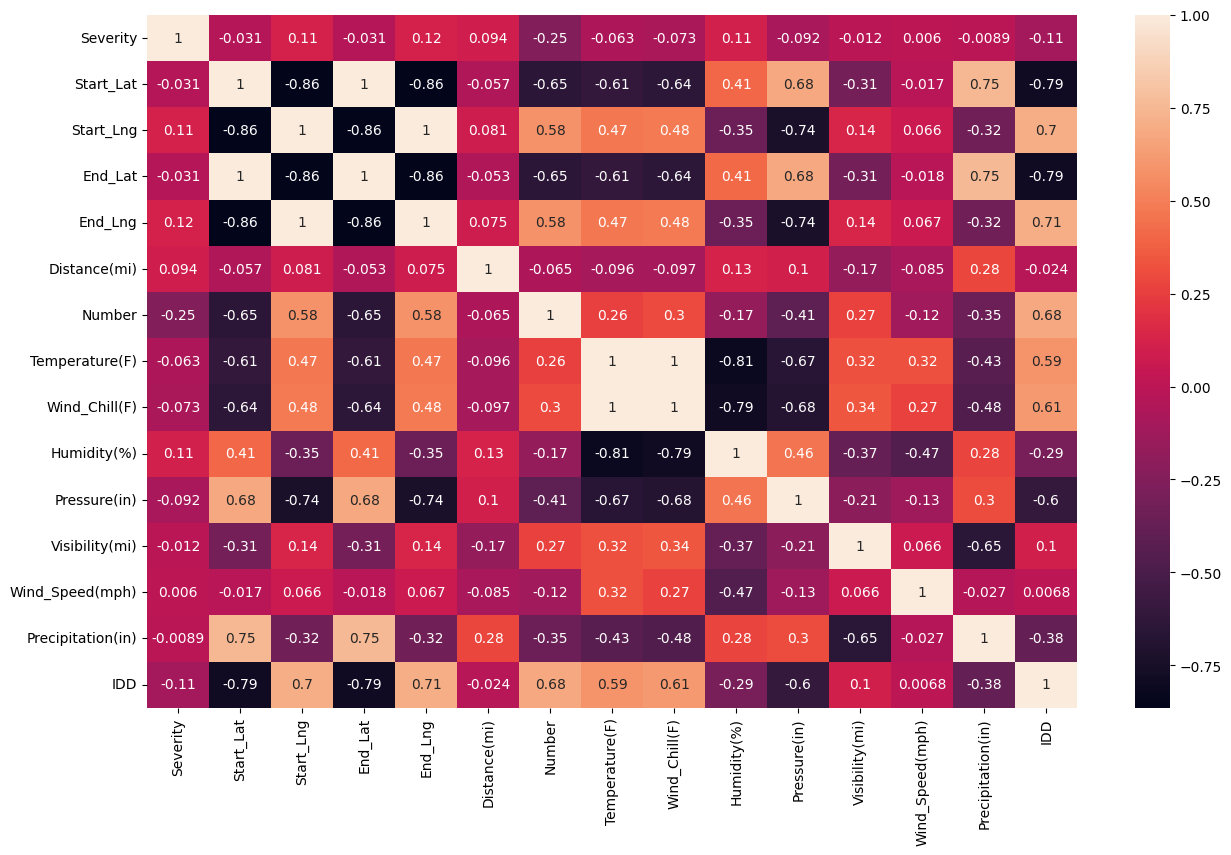

In [ ]:
plt.figure(figsize=(15 ,9))
sns.heatmap(df_num.corr() , annot=True)

In [ ]:
cities = df1['City'].unique()
len(cities)

48

In [ ]:
accidents_by_cities = df1['City'].value_counts()
accidents_by_cities

City
Newhall             33
Canyon Country      24
Castaic             20
Valencia            20
Beaumont            19
Simi Valley         12
Santa Clarita       11
Porter Ranch         9
Sacramento           8
Calimesa             5
Fairfield            4
Cabazon              4
Hemet                3
San Jose             3
Lucerne Valley       2
Cambria              2
Alta                 2
San Bernardino       2
King City            2
Wofford Heights      2
Barstow              2
Warner Springs       2
Yucaipa              2
Stevenson Ranch      2
Sun Valley           1
Diamond Bar          1
Friant               1
Ragged Point         1
Placerville          1
Citrus Heights       1
Jenner               1
Lee Vining           1
Pinole               1
Oakland              1
Calistoga            1
Richmond             1
Sunnyvale            1
Olivehurst           1
Soda Springs         1
Santa Rosa           1
South Lake Tahoe     1
Markleeville         1
Echo Lake            1
Sutter

In [ ]:
accidents_by_cities[:10]

City
Newhall           33
Canyon Country    24
Castaic           20
Valencia          20
Beaumont          19
Simi Valley       12
Santa Clarita     11
Porter Ranch       9
Sacramento         8
Calimesa           5
Name: count, dtype: int64

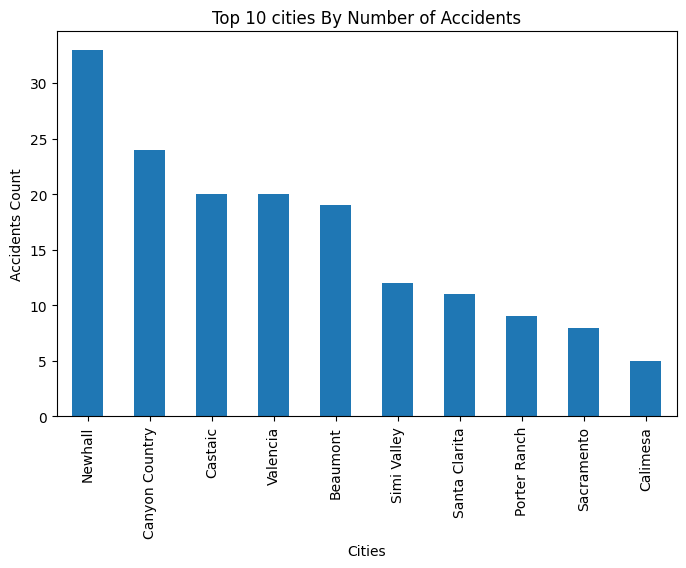

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
accidents_by_cities[:10].plot(kind='bar')
ax.set(title = 'Top 10 cities By Number of Accidents',
       xlabel = 'Cities',
       ylabel = 'Accidents Count')
plt.show()

In [ ]:
accidents_severity = df1.groupby('Severity').count()['ID']
accidents_severity

Severity
2    171
3     32
4     16
Name: ID, dtype: int64

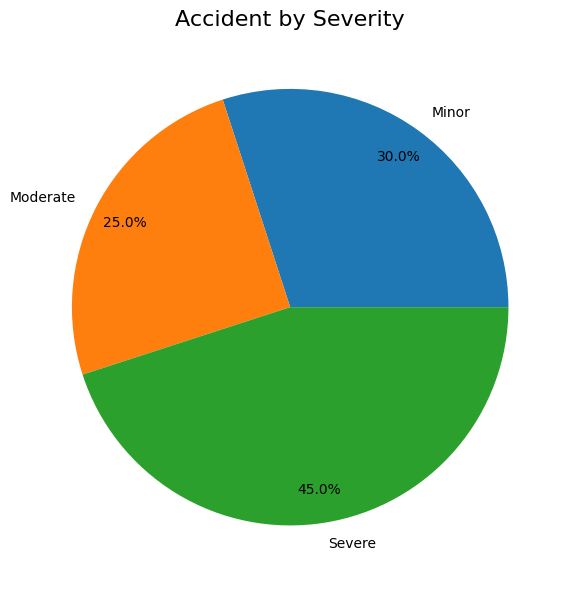

In [ ]:
import matplotlib.pyplot as plt

# Assuming accidents_severity is a numerical array and labels is a list of strings
accidents_severity = [30, 25, 45]
label = ['Minor', 'Moderate', 'Severe']

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))  # Create figure and axis
plt.pie(accidents_severity, labels=label, autopct='%1.1f%%', pctdistance=0.85)  # Plot pie chart

ax.set_title("Accident by Severity", fontdict={'fontsize': 16})  # Set title with formatting
plt.tight_layout()  # Adjust spacing for better readability
plt.show()  # Display the plot


In [ ]:
df1['Start_Time'].dtypes

dtype('O')

In [ ]:
df1['End_Time'].dtypes

dtype('O')

In [ ]:
df1 = df1.astype({'Start_Time': 'datetime64[ns]', 'End_Time': 'datetime64[ns]'})
df1['Start_Time'].dtypes

dtype('<M8[ns]')

In [ ]:
df1['Start_Time'][2408]

Timestamp('2016-04-22 12:54:44')

In [ ]:
df1['End_Time'][2408]

Timestamp('2016-04-22 18:54:44')

In [ ]:
df1['start_date'] = [d.date() for d in df1['Start_Time']]
df1['start_time'] = [d.time() for d in df1['Start_Time']]

In [ ]:
df1['end_date'] = [d.date() for d in df1['End_Time']]
df1['end_time'] = [d.time() for d in df1['End_Time']]

In [ ]:
df1['end_time']

994      09:48:55
1041     10:52:36
1162     12:29:10
1173     12:41:55
1214     03:48:12
           ...   
13873    01:12:51
14102    14:28:01
14141    22:36:45
14180    18:52:46
14190    19:26:09
Name: end_time, Length: 219, dtype: object

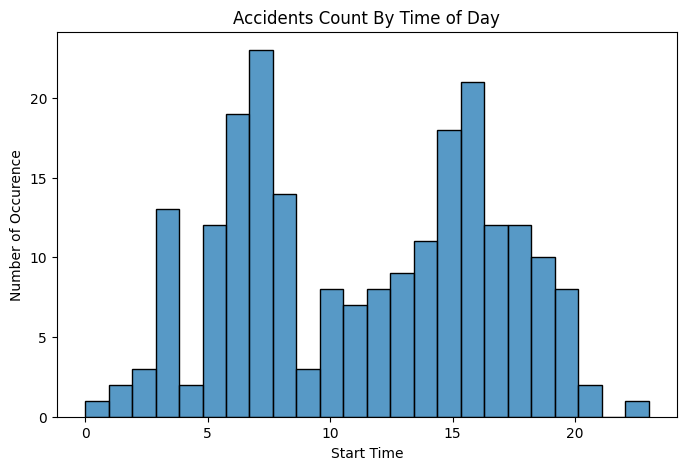

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("Start Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

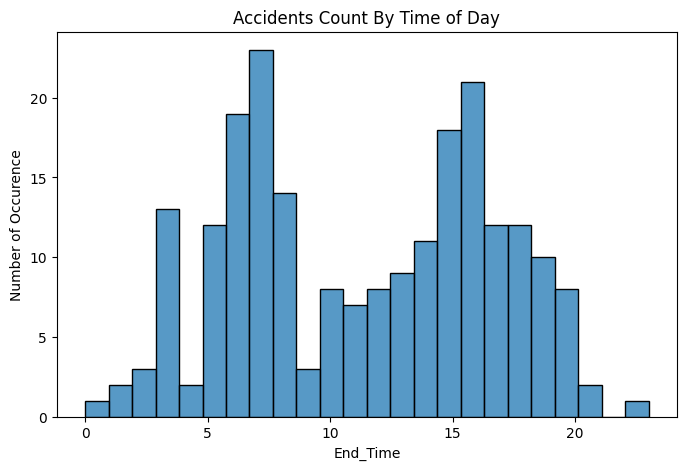

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.histplot(df1['Start_Time'].dt.hour, bins = 24)

plt.xlabel("End_Time")
plt.ylabel("Number of Occurence")
plt.title('Accidents Count By Time of Day')

plt.show()

In [ ]:
del df1['Start_Time']
del df1['End_Time']

In [ ]:
%matplotlib inline
import os

In [70]:
df_num.shape

(219, 15)

In [71]:
# Accidents by order of severity (1 being lowest, and 4 being highest)

df1.groupby('Severity').count()['IDD']

Severity
2    171
3     32
4     16
Name: IDD, dtype: int64

<Axes: xlabel='Severity', ylabel='Start_Lat'>

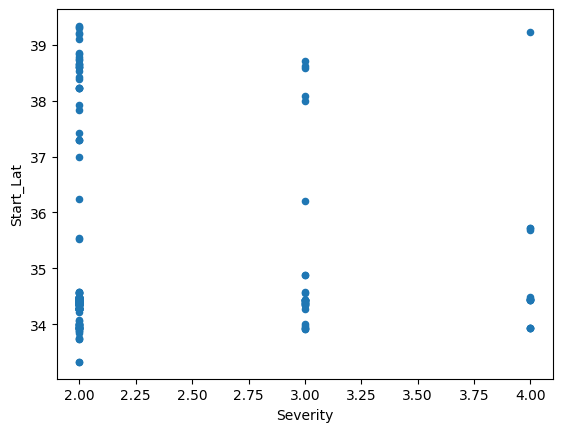

In [72]:
df_num.plot(kind='scatter', y='Start_Lat', x='Severity')

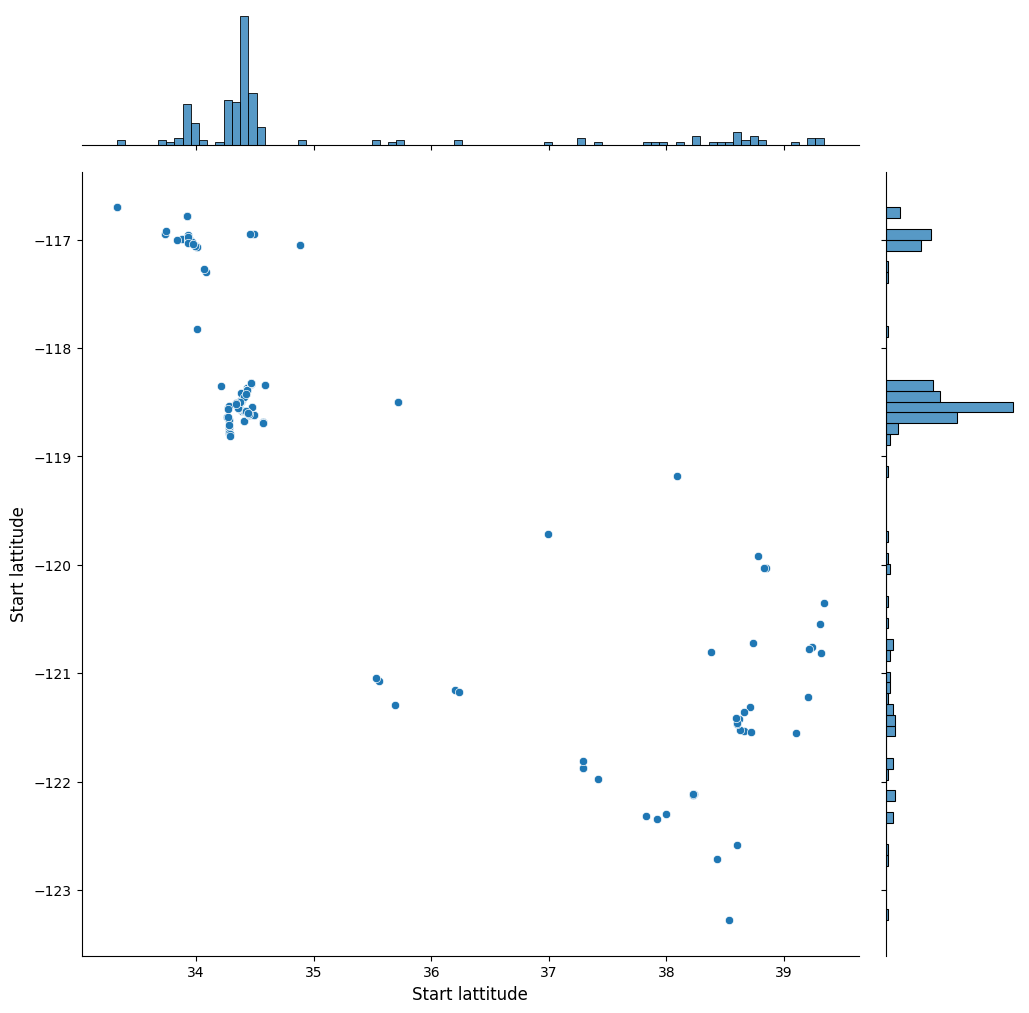

In [73]:
sns.jointplot(x=df_num.Start_Lat.values , y=df_num.Start_Lng.values,height=10)
plt.ylabel('Start lattitude', fontsize=12)
plt.xlabel('Start lattitude', fontsize=12)
plt.show()

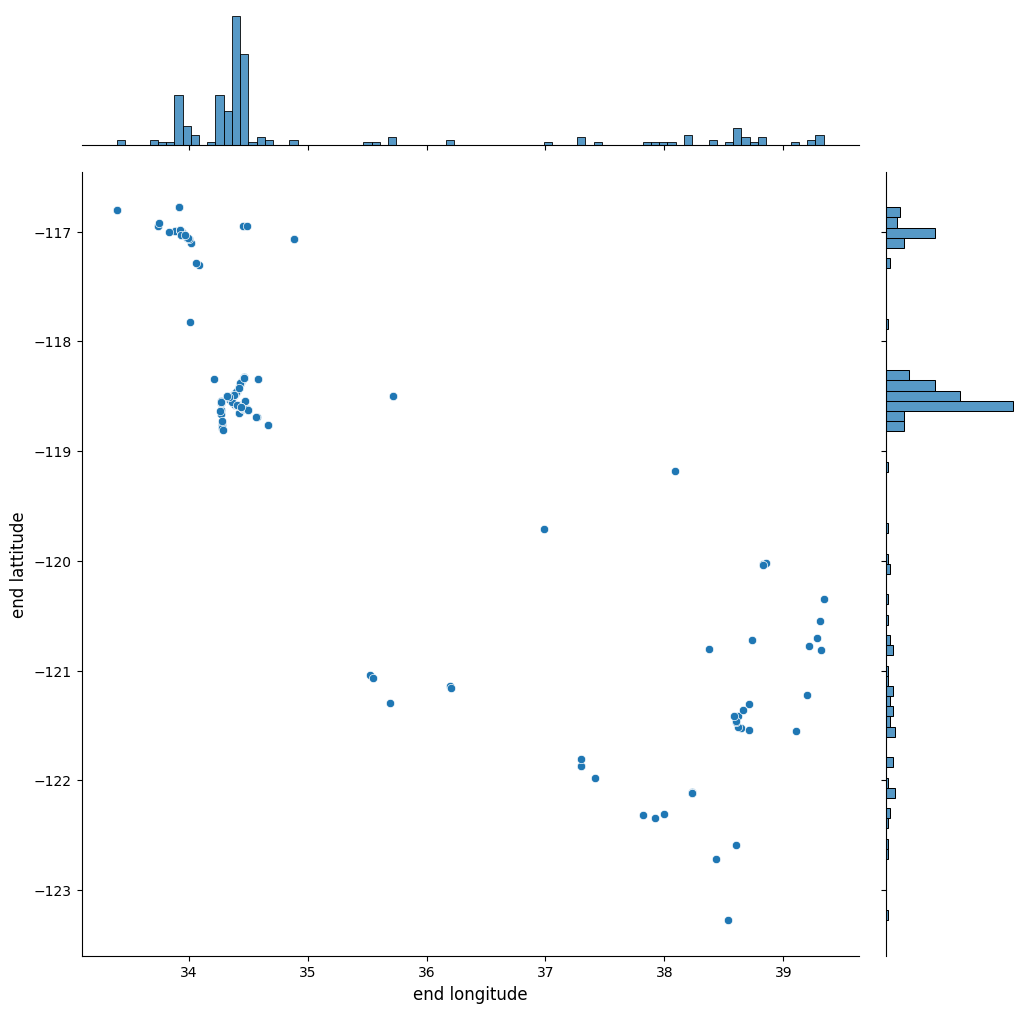

In [75]:
sns.jointplot(x=df_num.End_Lat.values , y=df_num.End_Lng.values,height=10)
plt.ylabel('end lattitude', fontsize=12)
plt.xlabel('end longitude', fontsize=12)
plt.show()